# Module 4: Anomaly Detection
## Cumulative Exercise:
### Outlier Detection for Linear Regression on an Auto MPG Dataset

In this exercise, you'll be attempting linear (Ridge) regression on a dataset encoding automotive 
MPG against several other discrete and continuous variables, 
as described [here](https://archive.ics.uci.edu/ml/datasets/auto+mpg) in the UCI repository.

### Notes
1. The clearest use of this dataset is to predict MPG, which is column one in the .txt.
2. For convenience, some `NaN` values have been pre-emptively cleaned from this dataset. Looking at the original dataset, there are a handful of entries containing null or `?` values, which we have removed.

In [47]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
# path to dataset
DATASET = '/dsa/data/all_datasets/autoMPG-1.txt'
assert os.path.exists(DATASET)   # check if datafile is present

# Read your data into a DataFrame called 'dataset'
dataset = pd.read_csv(DATASET, index_col=0).dropna().sample(frac=1).reset_index(drop = True)
dataset.describe()



,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,423.000000,423.000000,423.000000,423.000000,4.230000e+02,423.000000,423.000000,423.000000
mean,22.151443,5.824960,196.756004,477.616796,8.785400e+05,15.538771,82.095406,1.569740
std,8.817102,2.720733,111.032114,1411.463705,3.249376e+06,2.729471,29.467660,0.799426
min,3.625937,-0.743522,-19.283003,46.000000,1.613000e+03,8.000000,-18.076791,1.000000
25%,16.000000,4.000000,102.500000,78.000000,2.259500e+03,13.700000,73.000000,1.000000
50%,21.500000,5.056846,151.000000,96.000000,2.930000e+03,15.500000,76.000000,1.000000
75%,28.050000,8.000000,302.000000,145.000000,3.860000e+03,17.000000,80.000000,2.000000
max,46.600000,31.872541,604.080466,10222.846370,1.879313e+07,24.800000,284.100062,3.000000


Pull columns from dataset into variables X (everything except mpg) and y (mpg).

In [48]:
# Complete code below this comment  (Question #001)
# ----------------------------------


X = np.array(dataset.loc[:,~dataset.columns.isin(['mpg','car_name'])])
y = np.array(dataset['mpg'])

Create training/validation split with 30% held out. 

In [49]:
# Complete code below this comment  (Question #E002)
# ----------------------------------

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)



Fit a Ridge regressor without anomaly detection and report R^2 measure on the train set.

In [50]:
# Complete code below this comment  (Question #E003)
# ----------------------------------

raw_model = Ridge().fit(X_train, y_train)
y_pred = raw_model.predict(X_train)
from sklearn.metrics import r2_score
r_two1 = r2_score(y_train,y_pred)
r_two1

0.6053742570084019

Create prediction from X_test and store into variable <span style="background: yellow;">naive_predictions</span>. Report R^2 measure.

In [51]:
# Complete code below this comment  (Question #E004)
# ----------------------------------

naive_predictions = raw_model.predict(X_test)
r_two2 = r2_score(y_test,naive_predictions)
r_two2

0.6463188287757796

Create a scatter plot of y_test against naive predictions.  
The following is for reference.

~~~python
plt.scatter(<placeholder>, <placeholder>)
plt.title("No outlier reduction")
plt.xlabel("Y-actual (raw splits)")
plt.ylabel("Y-predicted (from raw model)")
plt.show()
~~~

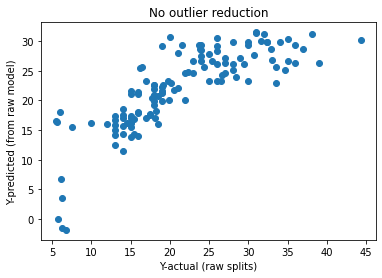

In [52]:
# Complete code below this comment  (Question #E005)
# ----------------------------------

plt.scatter(y_test,naive_predictions)
plt.title("No outlier reduction")
plt.xlabel("Y-actual (raw splits)")
plt.ylabel("Y-predicted (from raw model)")
plt.show()




### Using a model of your choice, remove outliers from X and y.

Import your tools for outlier reduction.  
Options include: `KMeans`, `EllipticEnvelope`, `IsolationForest`, and `OneClassSVM`. 

In [53]:
# Complete code below this comment  (Question #E006)
# ----------------------------------
from sklearn.ensemble import IsolationForest





Create training/test set with the removal of outliers from the above training/test set. 

In [61]:
# Complete code below this comment  (Question #E007)
# ----------------------------------
iso_forest = IsolationForest(contamination=0.1).fit(X_train, y_train)
iso_outliers = iso_forest.predict(X_train)==-1
print(f"Num of outliers = {np.sum(iso_outliers)}")
X_trainiso = X_train[~iso_outliers]
y_trainiso = y_train[~iso_outliers]

iso_foresttest = IsolationForest(contamination=0.1).fit(X_test, y_test)
iso_outlierstest = iso_foresttest.predict(X_test)==-1
print(f"Num of outliers = {np.sum(iso_outlierstest)}")
X_testiso = X_test[~iso_outlierstest]
y_testiso = y_test[~iso_outlierstest]


## our practices and labs didn't show removing outliers in the testing set, but I will do this anyway as this is what the question implies we should do 'Create training/test set with the removal of outliers from the above training/test set'

Num of outliers = 30
Num of outliers = 13


Fit a new model against inliers and print score (R^2) for the model.

In [62]:
# Complete code below this comment  (Question #E008)
# ----------------------------------

iso_model = LinearRegression()
iso_model.fit(X_trainiso, y_trainiso)


iso_predictions = iso_model.predict(X_trainiso)
r_two3 = r2_score(y_trainiso,iso_predictions)
r_two3

0.8318076562859983

Predict with the test set, report R^2, and plot y-actual against y-predicted again for labels in testing set.

0.8244089030050994


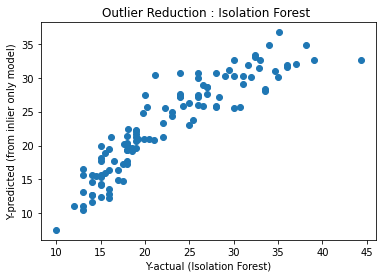

In [71]:
# Complete code below this comment  (Question #E009)
# ----------------------------------

iso_predictionstest = iso_model.predict(X_testiso)
r_two4 = r2_score(y_testiso, iso_predictionstest)
print(r_two4)


plt.scatter(y_testiso,iso_predictionstest)
plt.title("Outlier Reduction : Isolation Forest ")
plt.xlabel("Y-actual (Isolation Forest)")
plt.ylabel("Y-predicted (from inlier only model)")
plt.show()

##again, am using the test set that was made without outliers as the question isn't specific as to which is preferred (our orginial testing set or our testing set without outliers) 

Pickle (serialize) your model as the file named: `my_module_4_model.pkl`

In [73]:
# Complete code below this comment  (Question #E010)
# ----------------------------------


import joblib
joblib.dump(iso_model, 'my_module_4_model.pkl')



['my_module_4_model.pkl']

# Save your notebook!